In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages


In [38]:
%matplotlib inline

In [39]:
file_path = 'CopyCat.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [40]:
df = df.drop(columns=['Unnamed: 7'], errors='ignore')

In [13]:
from scipy.stats import pearsonr

# Select only the metric columns
metrics = df[['METRIC 1', 'METRIC 2', 'METRIC 3', 'METRIC 4']]

# Calculate the Pearson correlation matrix
corr_matrix = metrics.corr()

# Calculate p-values for each pair of metrics
p_values = pd.DataFrame(np.zeros((metrics.shape[1], metrics.shape[1])), columns=metrics.columns, index=metrics.columns)

# Loop through each pair of metrics to calculate the p-value
for i in metrics.columns:
    for j in metrics.columns:
        corr, p = pearsonr(metrics[i], metrics[j])
        p_values.loc[i, j] = p

# Display the correlation matrix and p-values
print("Correlation Matrix:")
print(corr_matrix)
print("\nP-Values Matrix:")
print(p_values)


Correlation Matrix:
          METRIC 1  METRIC 2  METRIC 3  METRIC 4
METRIC 1  1.000000  0.185857  0.023269  0.016069
METRIC 2  0.185857  1.000000 -0.048828 -0.061865
METRIC 3  0.023269 -0.048828  1.000000  0.646471
METRIC 4  0.016069 -0.061865  0.646471  1.000000

P-Values Matrix:
          METRIC 1  METRIC 2      METRIC 3      METRIC 4
METRIC 1  0.000000  0.000296  6.533166e-01  7.564386e-01
METRIC 2  0.000296  0.000000  3.457067e-01  2.320281e-01
METRIC 3  0.653317  0.345707  0.000000e+00  9.382448e-46
METRIC 4  0.756439  0.232028  9.382448e-46  0.000000e+00


In [11]:




# Separate the dataset into two parts based on stance
df_stance_1 = df[df['Stance'] == 1]
df_stance_0 = df[df['Stance'] == 0]

# Calculate descriptive statistics for both subsets
descriptive_stance_1 = df_stance_1[['METRIC 1', 'METRIC 2', 'METRIC 3', 'METRIC 4']].describe()
descriptive_stance_0 = df_stance_0[['METRIC 1', 'METRIC 2', 'METRIC 3', 'METRIC 4']].describe()

# Display the results
print("Descriptive Statistics for Stance = 1")
print(descriptive_stance_1)

print("\nDescriptive Statistics for Stance = 0")
print(descriptive_stance_0)


Descriptive Statistics for Stance = 1
         METRIC 1    METRIC 2    METRIC 3    METRIC 4
count  193.000000  193.000000  193.000000  193.000000
mean     2.663212    3.943005    1.227979    1.937824
std      1.222848    0.253856    1.788227    1.938177
min      1.000000    2.000000    0.000000    0.000000
25%      2.000000    4.000000    0.000000    0.000000
50%      3.000000    4.000000    0.000000    2.000000
75%      4.000000    4.000000    4.000000    4.000000
max      4.000000    4.000000    4.000000    4.000000

Descriptive Statistics for Stance = 0
         METRIC 1    METRIC 2    METRIC 3    METRIC 4
count  182.000000  182.000000  182.000000  182.000000
mean     3.780220    3.945055    1.582418    2.450549
std      0.521413    0.251521    1.892503    1.913972
min      2.000000    2.000000    0.000000    0.000000
25%      4.000000    4.000000    0.000000    0.000000
50%      4.000000    4.000000    0.000000    4.000000
75%      4.000000    4.000000    4.000000    4.000000
max  

In [13]:
metric = 'METRIC 1'

# Calculate means and standard deviations
mean_stance_1 = df_stance_1[metric].mean()
mean_stance_0 = df_stance_0[metric].mean()
std_stance_1 = df_stance_1[metric].std()
std_stance_0 = df_stance_0[metric].std()

# Sample sizes
n1 = len(df_stance_1[metric])
n2 = len(df_stance_0[metric])

# Calculate pooled standard deviation
s_pooled = (((n1 - 1) * std_stance_1**2 + (n2 - 1) * std_stance_0**2) / (n1 + n2 - 2)) ** 0.5

# Calculate T-statistic
t_statistic = (mean_stance_1 - mean_stance_0) / (s_pooled * ((1/n1) + (1/n2)) ** 0.5)

# Calculate degrees of freedom
df = n1 + n2 - 2

# Get the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Output the results
print(f'T-statistic for {metric}: {t_statistic}')
print(f'P-value for {metric}: {p_value}')

T-statistic for METRIC 1: -11.385034792136834
P-value for METRIC 1: 0.0


In [20]:


# Separate the dataset
df_stance_1 = df[df['Stance'] == 1]
df_stance_0 = df[df['Stance'] == 0]

# List of metrics to analyze
metrics = ['METRIC 1', 'METRIC 2', 'METRIC 3', 'METRIC 4']
results = {}

# Conduct T-tests for each metric
for metric in metrics:
    t_statistic, p_value = stats.ttest_ind(df_stance_1[metric], df_stance_0[metric], equal_var=False)
    results[metric] = {
        'T-statistic': t_statistic,
        'P-value': p_value,
        'Mean Stance 1': df_stance_1[metric].mean(),
        'Mean Stance 0': df_stance_0[metric].mean()
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)



          T-statistic       P-value  Mean Stance 1  Mean Stance 0
METRIC 1   -11.619258  1.840256e-25       2.663212       3.780220
METRIC 2    -0.078518  9.374579e-01       3.943005       3.945055
METRIC 3    -1.861662  6.344750e-02       1.227979       1.582418
METRIC 4    -2.576809  1.035612e-02       1.937824       2.450549


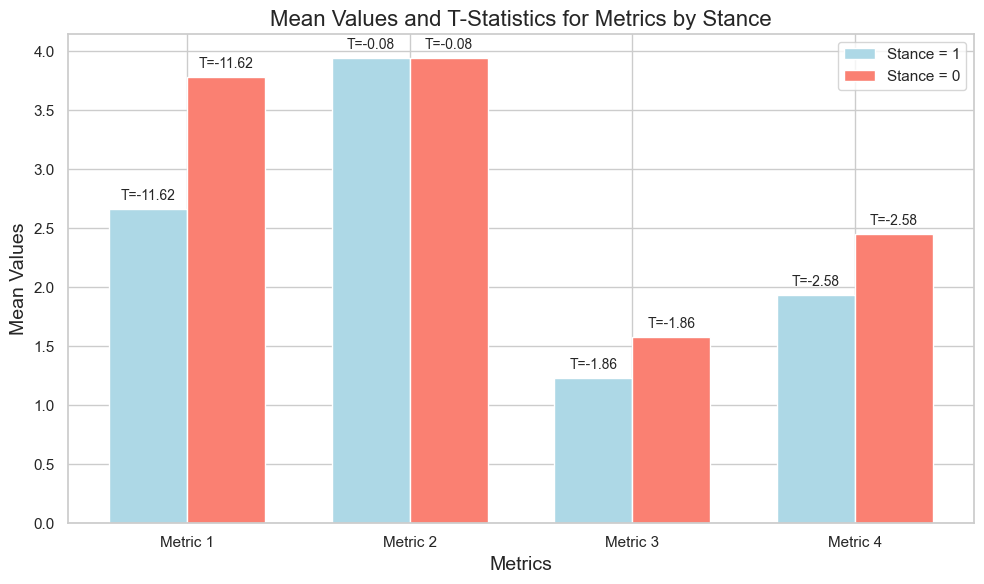

In [8]:
data = {
    'Metric': ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4'],
    'Mean (Stance = 1)': [2.663212, 3.943005, 1.227979, 1.937824],  # Replace with actual means for stance = 1
    'Mean (Stance = 0)': [3.780220, 3.945055, 1.582418, 2.450549],   # Replace with actual means for stance = 0
    'T-statistic': [-11.619258, -0.078518, -1.861662, -2.576809]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))

# Create bar plots for means
bar_width = 0.35
index = range(len(df))

bar1 = plt.bar(index, df['Mean (Stance = 1)'], bar_width, label='Stance = 1', color='lightblue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean (Stance = 0)'], bar_width, label='Stance = 0', color='salmon')

# Add T-statistics as annotations
for i in index:
    plt.text(i, df['Mean (Stance = 1)'][i] + 0.05, f'T={df["T-statistic"][i]:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, df['Mean (Stance = 0)'][i] + 0.05, f'T={df["T-statistic"][i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Mean Values and T-Statistics for Metrics by Stance', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Mean Values', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df['Metric'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('t_statistics_visualization.png', dpi=150)  # Save the figure
plt.show()

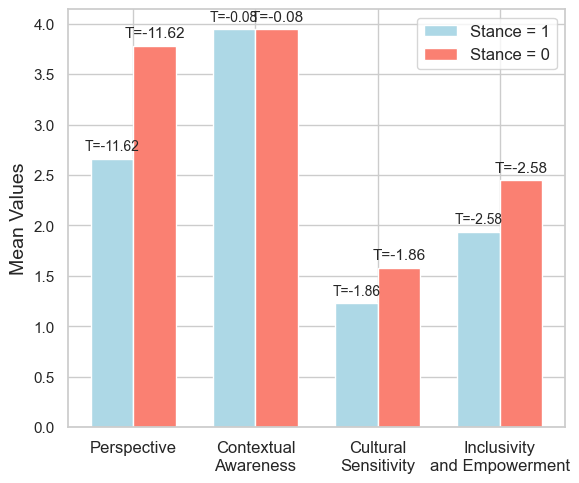

In [17]:
data = {
    'Metric': ['Perspective', 'Contextual\nAwareness', 'Cultural\nSensitivity', 'Inclusivity\nand Empowerment'],
    'Mean (Stance = 1)': [2.663212, 3.943005, 1.227979, 1.937824],
    'Mean (Stance = 0)': [3.780220, 3.945055, 1.582418, 2.450549],
    'T-statistic': [-11.619258, -0.078518, -1.861662, -2.576809]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create the bar plot with even smaller size
plt.figure(figsize=(6, 5))  # Reduced the size further

# Create bar plots for means
bar_width = 0.35
index = range(len(df))

bar1 = plt.bar(index, df['Mean (Stance = 1)'], bar_width, label='Stance = 1', color='lightblue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean (Stance = 0)'], bar_width, label='Stance = 0', color='salmon')

# Add T-statistics as annotations with larger text
for i in index:
    plt.text(i, df['Mean (Stance = 1)'][i] + 0.05, f'T={df["T-statistic"][i]:.2f}', ha='center', va='bottom', fontsize=10)  # Increased fontsize for T values
    plt.text(i + bar_width, df['Mean (Stance = 0)'][i] + 0.05, f'T={df["T-statistic"][i]:.2f}', ha='center', va='bottom', fontsize=11)  # Increased fontsize for T values

# Adding labels, no caption
plt.ylabel('Mean Values', fontsize=14)  # Increased label text size
plt.xticks([i + bar_width / 2 for i in index], df['Metric'], fontsize=12)  # Increased tick label size
plt.legend(fontsize=12)  # Increased legend text size

# Show the plot with tight layout and save it
plt.tight_layout()
plt.savefig('t_statistics_visualization_smaller_textsize.png', dpi=150)  # Save the figure
plt.show()

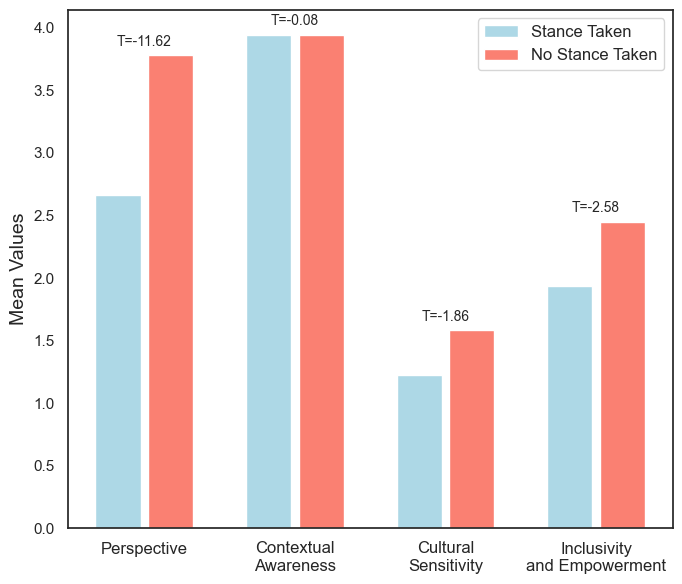

In [26]:
data = {
    'Metric': ['Perspective', 'Contextual\nAwareness', 'Cultural\nSensitivity', 'Inclusivity\nand Empowerment'],
    'Mean (Stance = 1)': [2.663212, 3.943005, 1.227979, 1.937824],
    'Mean (Stance = 0)': [3.780220, 3.945055, 1.582418, 2.450549],
    'T-statistic': [-11.619258, -0.078518, -1.861662, -2.576809]
}

df = pd.DataFrame(data)

# Set the style without grid lines
sns.set_style("white")  # "white" removes grid lines, keeping clean background

# Create the bar plot with smaller size and separation within pairs
plt.figure(figsize=(7, 6))

# Create bar plots for means
bar_width = 0.3  # Width of bars
index = range(len(df))
pair_gap = 0.05  # Gap between the bars in each pair (inside pair separation)

bar1 = plt.bar([i - (bar_width + pair_gap)/2 for i in index], df['Mean (Stance = 1)'], bar_width, label='Stance Taken', color='lightblue')
bar2 = plt.bar([i + (bar_width + pair_gap)/2 for i in index], df['Mean (Stance = 0)'], bar_width, label='No Stance Taken', color='salmon')

# Add T-statistics once in the middle of each pair
for i in index:
    midpoint = i  # Midpoint between the pair
    plt.text(midpoint, max(df['Mean (Stance = 1)'][i], df['Mean (Stance = 0)'][i]) + 0.05, 
             f'T={df["T-statistic"][i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding labels
plt.ylabel('Mean Values', fontsize=14)
plt.xticks([i for i in index], df['Metric'], fontsize=12)
plt.legend(fontsize=12)

# Show the plot with tight layout and save it as a PNG file
plt.tight_layout()
plt.savefig('t_statistics_visualization_single_T_Finalismo.png', dpi=150)  # Save the figure as PNG
plt.show()
